In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sal= pd.read_excel("/content/Salary (1).xlsx")

In [ ]:
sal.describe()

,Experience,Salary
count,22.000000,22.000000
mean,2.481818,41820.409091
std,1.147932,8594.095363
min,1.000000,30000.000000
25%,1.600000,34000.000000
50%,2.100000,42539.500000
75%,3.450000,48725.000000
max,4.900000,60000.000000


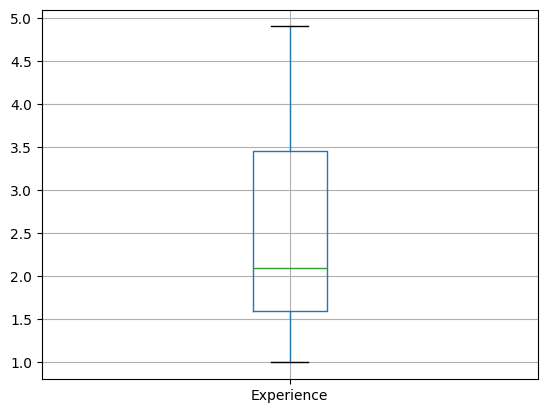

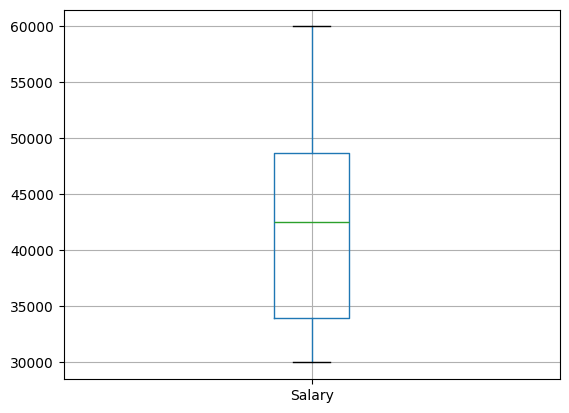

In [ ]:
for i in sal.columns:
  sal.boxplot(column=i)
  plt.show()

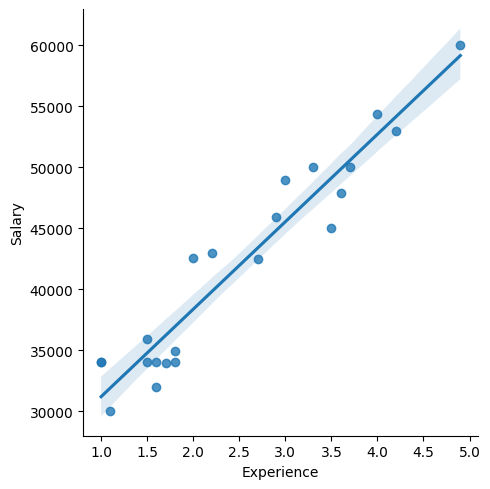

In [ ]:
sns.lmplot(x='Experience',y='Salary',data=sal)
plt.show()

In [ ]:
x=sal.iloc[:,0:-1]
#sal.iloc[:,0].values (answer shown in array)
y=sal.iloc[:,-1]

<Axes: xlabel='Salary', ylabel='Density'>

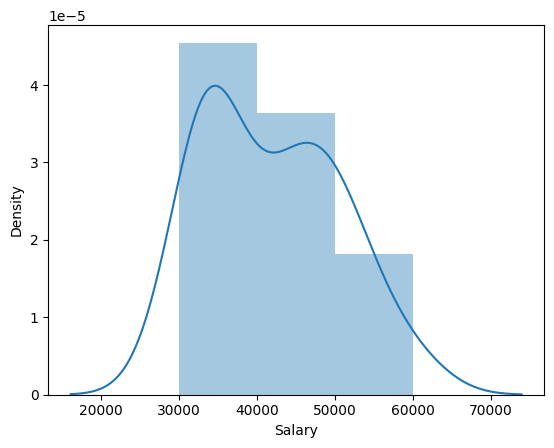

In [ ]:
sns.distplot(y)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(17, 1)
(5, 1)
(17,)
(5,)


Training Phase

In [ ]:
#Fitting the simple linear regression model to the training dataset
from sklearn.linear_model import LinearRegression
#Create model object
lm=LinearRegression()
lm.fit(x_train,y_train) # input
# print intercept and coefficient
print(lm.intercept_)
print(lm.coef_)


24955.92271640363
[6884.57723577]


Testing Phase

In [ ]:
y_pred=lm.predict(x_test)
#for first showing
x_pred= lm.predict(x_train)

<function matplotlib.pyplot.show(close=None, block=None)>

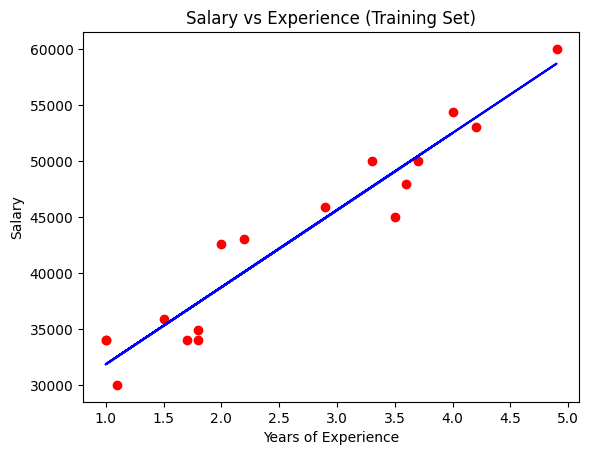

In [ ]:
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,x_pred,color='blue')
plt.title('Salary vs Experience (Training Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

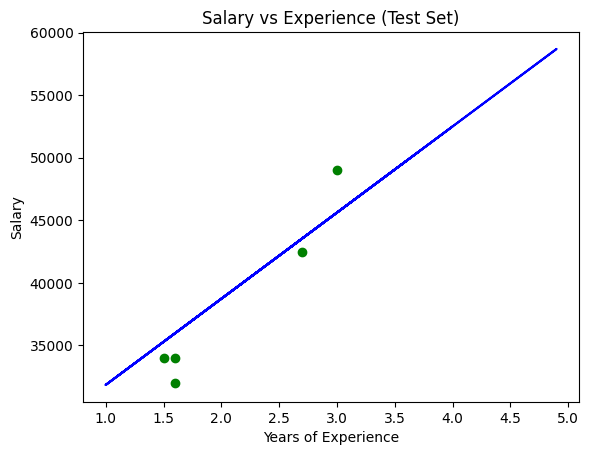

In [ ]:
plt.scatter(x_test,y_test,color='green')
plt.plot(x_train,x_pred,color='blue')
plt.title('Salary vs Experience (Test Set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show

In [ ]:
result = pd.DataFrame({'Experience':x_test.squeeze() ,'Actual': y_test, 'Predicted': y_pred})
result.reset_index(drop=True, inplace=True)
result

,Experience,Actual,Predicted
0,3.0,49000,45609.654424
1,1.5,34000,35282.788570
2,1.6,34000,35971.246294
3,1.6,32000,35971.246294
4,2.7,42500,43544.281253


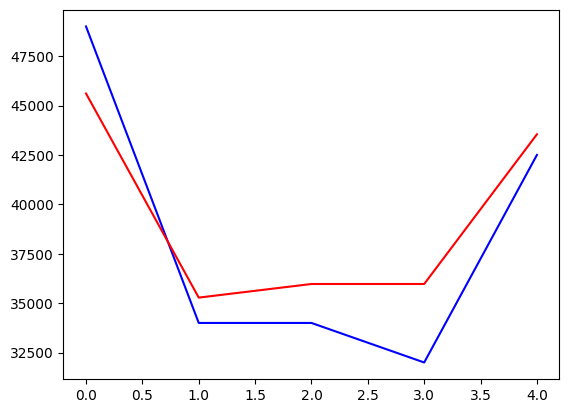

In [ ]:
result['Actual']=result['Actual'].plot(color="blue")
result['Predicted']=result['Predicted'].plot(color="red")
plt.show()

In [ ]:
result = pd.DataFrame({'Experience':x_test.squeeze() ,'Actual': y_test, 'Predicted': y_pred})
result.reset_index(drop=True, inplace=True)
result["Residual"]= result['Actual']- result['Predicted']
result

,Experience,Actual,Predicted,Residual
0,3.0,49000,45609.654424,3390.345576
1,1.5,34000,35282.788570,-1282.788570
2,1.6,34000,35971.246294,-1971.246294
3,1.6,32000,35971.246294,-3971.246294
4,2.7,42500,43544.281253,-1044.281253


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
r2= r2_score(y_test,y_pred)
print("R2 Score:",r2)

R2 Score: 0.8377053541553889


In [ ]:
#test data-- unseen data
test = pd.DataFrame({'Experience':[2.5,6,0,1,1.8,3]})
test

,Experience
0,2.5
1,6.0
2,0.0
3,1.0
4,1.8
5,3.0


In [ ]:
y_new = lm.predict(test)
y_new

array([42167.36580583, 66263.38613104, 24955.9227164 , 31840.49995218,
       37348.16174079, 45609.65442372])

In [ ]:
test["Predicted"]=y_new
test

,Experience,Predicted
0,2.5,42167.365806
1,6.0,66263.386131
2,0.0,24955.922716
3,1.0,31840.499952
4,1.8,37348.161741
5,3.0,45609.654424
